<a href="https://colab.research.google.com/github/AdrienVansuyt/Final_Thesis2_Engufing_Researches/blob/main/Analyse_Englobantes_BTC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
!pip install pandas_ta

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.1/115.1 kB 5.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pandas_ta: filename=pandas_ta-0.3.14b0-py3-none-any.whl size=218910 sha256=75864653423fdb1043c114d428046731dcd0d0efda60b80510db80194d7f2893
  Stored in directory: /root/.cache/pip/wheels/69/00/ac/f7fa862c34b0e2ef320175100c233377b4c558944f12474cf0
Successfully built pandas_ta


[*********************100%%**********************]  1 of 1 completed


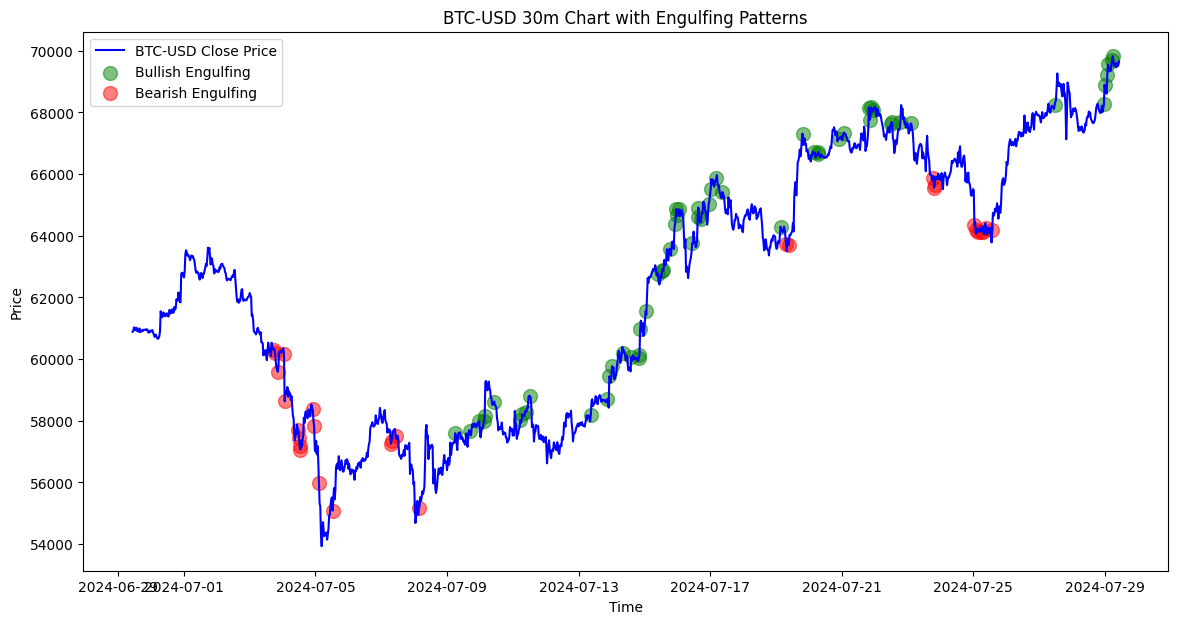

[*********************100%%**********************]  1 of 1 completed


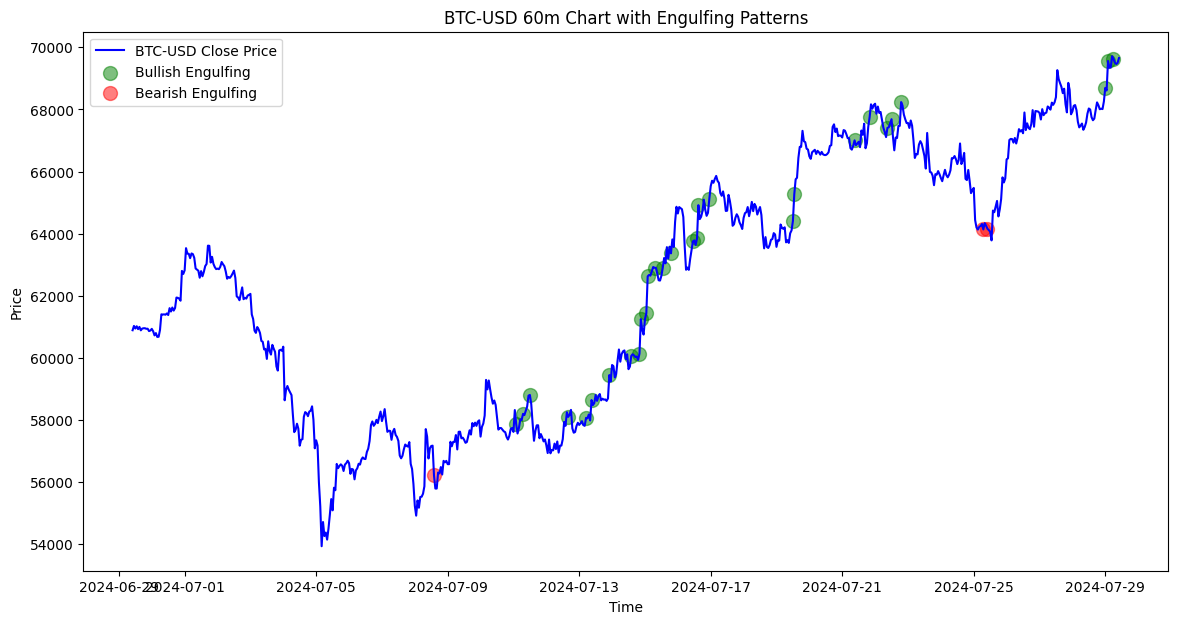

[*********************100%%**********************]  1 of 1 completed


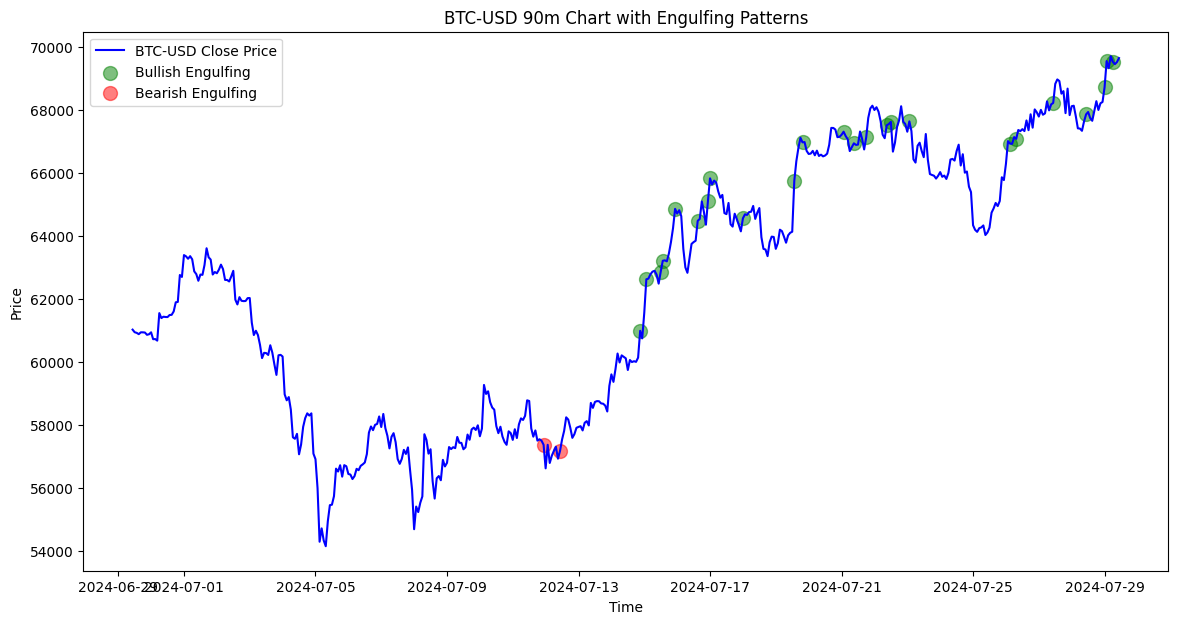

[*********************100%%**********************]  1 of 1 completed


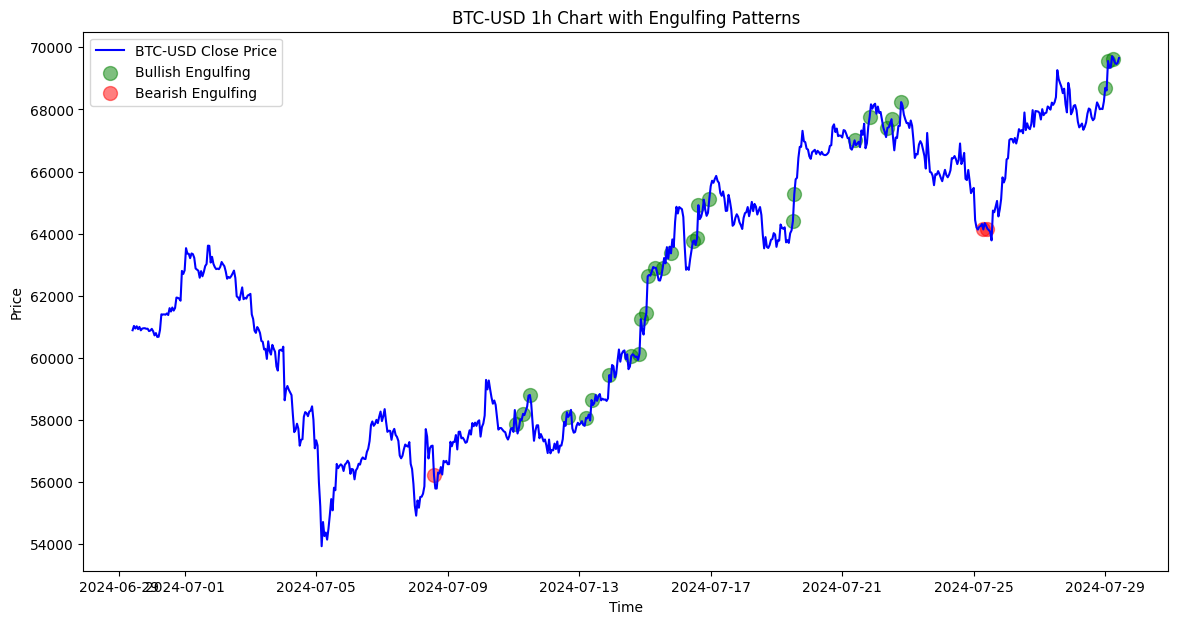

[*********************100%%**********************]  1 of 1 completed


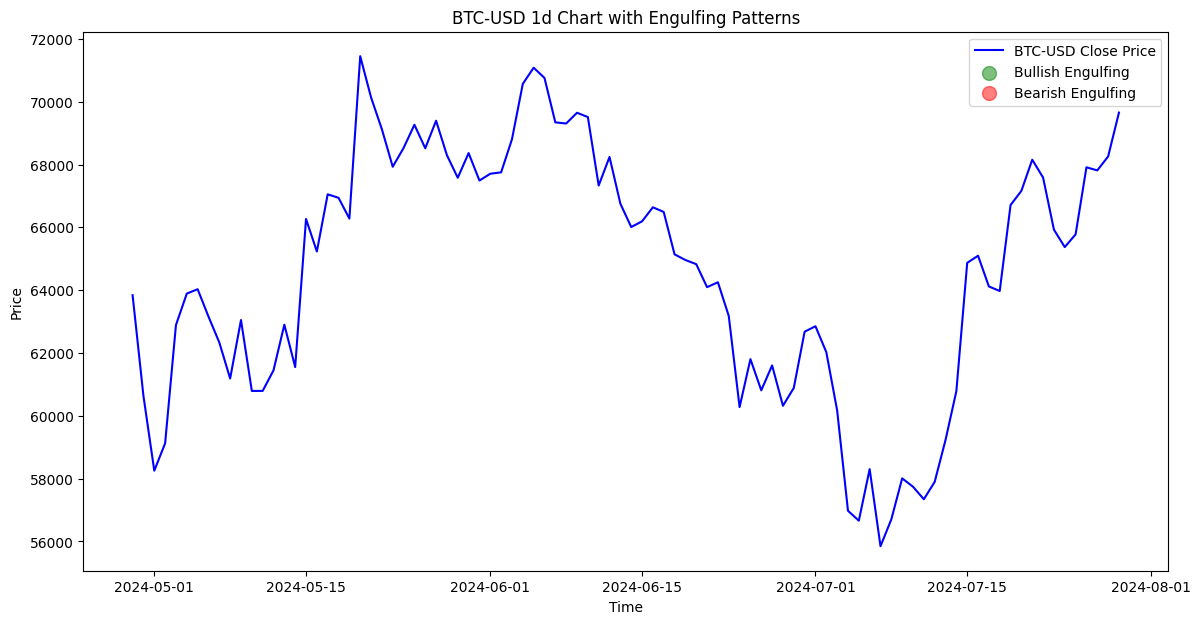

[*********************100%%**********************]  1 of 1 completed


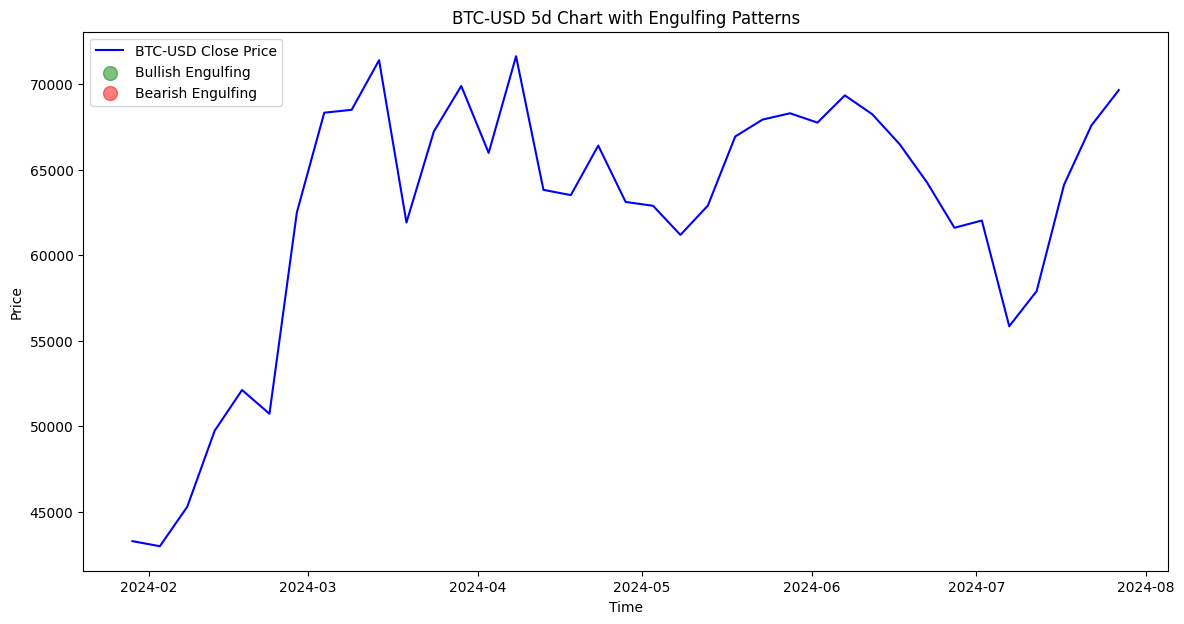

[*********************100%%**********************]  1 of 1 completed


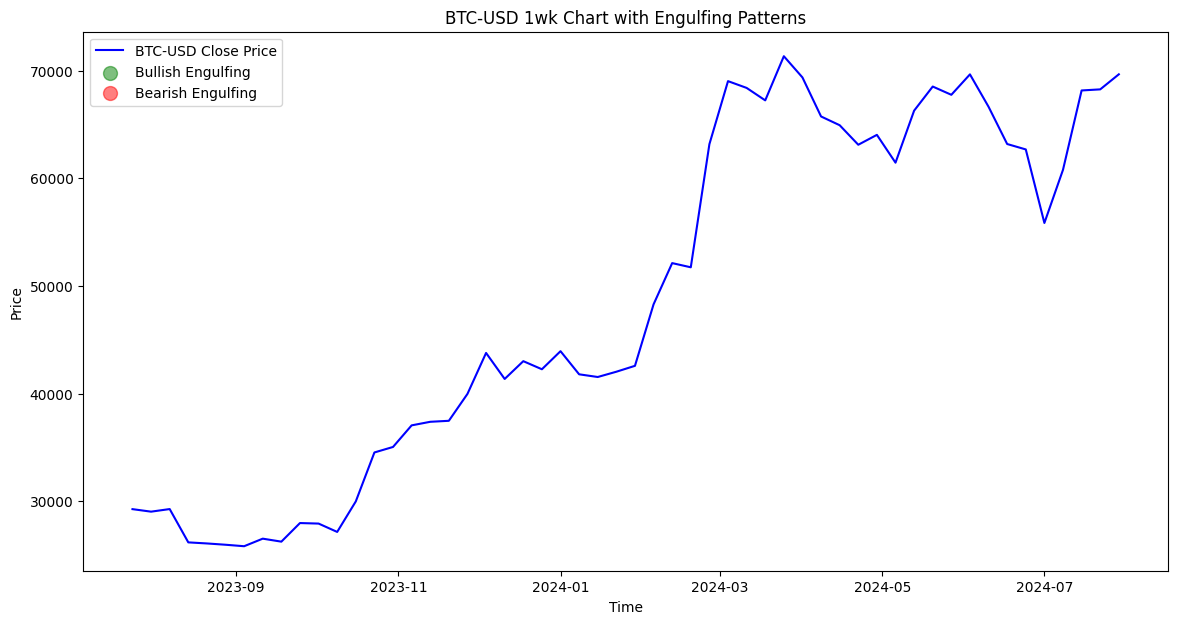

[*********************100%%**********************]  1 of 1 completed


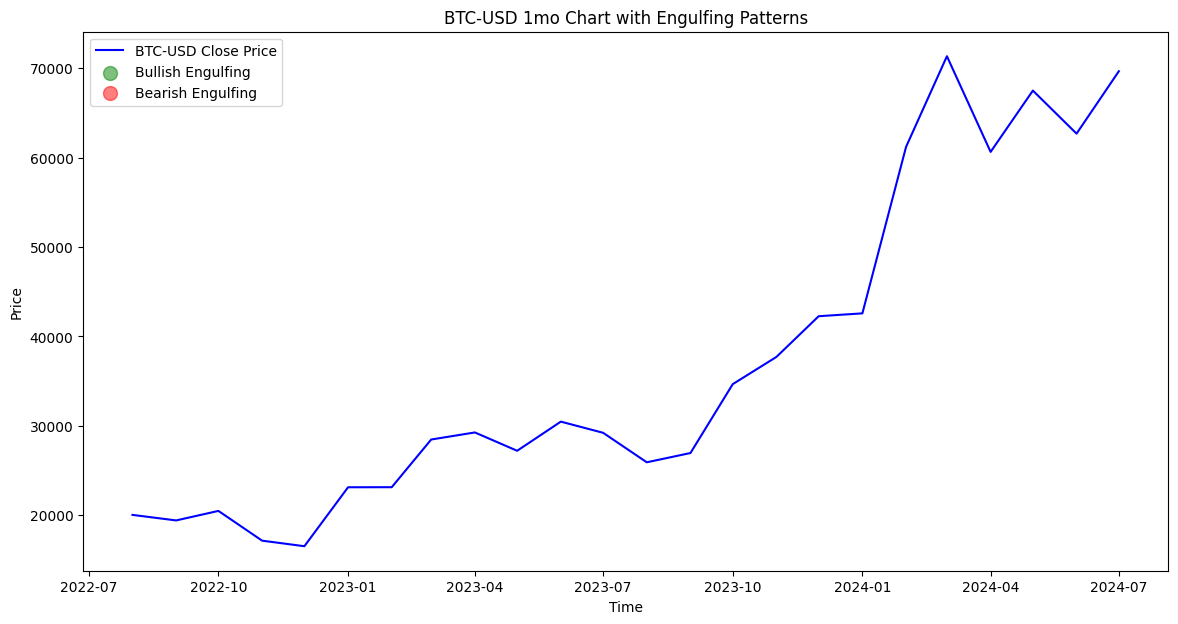

[*********************100%%**********************]  1 of 1 completed


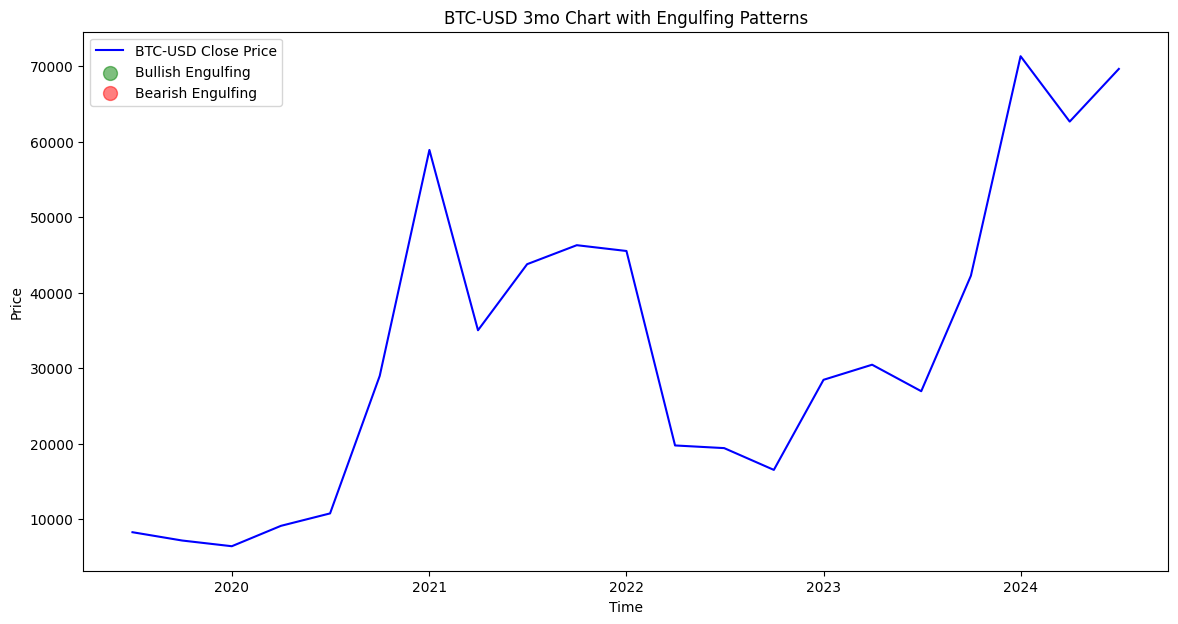

In [7]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas_ta as ta

# Liste des unités de temps (ordonnée du plus petit au plus grand)
timeframes = ['30m', '60m', '90m', '1h', '1d', '5d', '1wk', '1mo', '3mo']

# Mapper les unités de temps avec des périodes compatibles
period_map = {
    '30m': '1mo',
    '60m': '1mo',
    '90m': '1mo',
    '1h': '1mo',
    '1d': '3mo',
    '5d': '6mo',
    '1wk': '1y',
    '1mo': '2y',
    '3mo': '5y'
}

# Fonction pour détecter les patterns englobantes et filtrer par volume et moyennes mobiles
def detect_engulfing(data):
    signals = {'bullish_engulfing': [], 'bearish_engulfing': []}
    data['MA50'] = ta.sma(data['Close'], length=50)
    data['MA200'] = ta.sma(data['Close'], length=200)

    for i in range(1, len(data)):
        if pd.isna(data['MA50'][i]) or pd.isna(data['MA200'][i]):
            continue

        # Bullish Engulfing
        if data['Open'][i] < data['Close'][i-1] and data['Close'][i] > data['Open'][i-1] and data['Volume'][i] > data['Volume'][i-1]:
            if data['Close'][i] > data['MA50'][i] and data['MA50'][i] > data['MA200'][i]:
                signals['bullish_engulfing'].append(i)

        # Bearish Engulfing
        elif data['Open'][i] > data['Close'][i-1] and data['Close'][i] < data['Open'][i-1] and data['Volume'][i] > data['Volume'][i-1]:
            if data['Close'][i] < data['MA50'][i] and data['MA50'][i] < data['MA200'][i]:
                signals['bearish_engulfing'].append(i)

    return signals

# Télécharger les données du BTC et détecter les patterns pour chaque unité de temps
btc_ticker = 'BTC-USD'

for tf in timeframes:
    period = period_map[tf]
    data = yf.download(btc_ticker, period=period, interval=tf)
    if not data.empty:
        signals = detect_engulfing(data)

        # Tracer le graphique
        plt.figure(figsize=(14, 7))
        plt.plot(data['Close'], label='BTC-USD Close Price', color='blue')

        # Ajouter les pastilles pour les patterns
        plt.scatter(data.index[signals['bullish_engulfing']], data['Close'][signals['bullish_engulfing']], color='green', s=100, alpha=0.5, label='Bullish Engulfing')
        plt.scatter(data.index[signals['bearish_engulfing']], data['Close'][signals['bearish_engulfing']], color='red', s=100, alpha=0.5, label='Bearish Engulfing')

        plt.title(f'BTC-USD {tf} Chart with Engulfing Patterns')
        plt.xlabel('Time')
        plt.ylabel('Price')
        plt.legend()
        plt.show()
    else:
        print(f"No data available for {btc_ticker} with interval {tf}")


- # **Il semblerait que nos critères sur les patterns soient trop strict ce qui expliquerait que sur les unités de temps daily ou superieur, nous n'avons pas d'informations.**

- # **Nous allons donc élargir notre selection de pattern pour voir si on a des resultats dans les grandes unités de temps pour du swing.**

Ce script utilise des critères plus simples pour détecter les patterns d'englobantes haussières et baissières, en vérifiant simplement si la bougie englobante actuelle dépasse complètement la bougie précédente. Essayons cette version pour voir si elle produit des résultats pour les unités de temps plus grandes.

[*********************100%%**********************]  1 of 1 completed


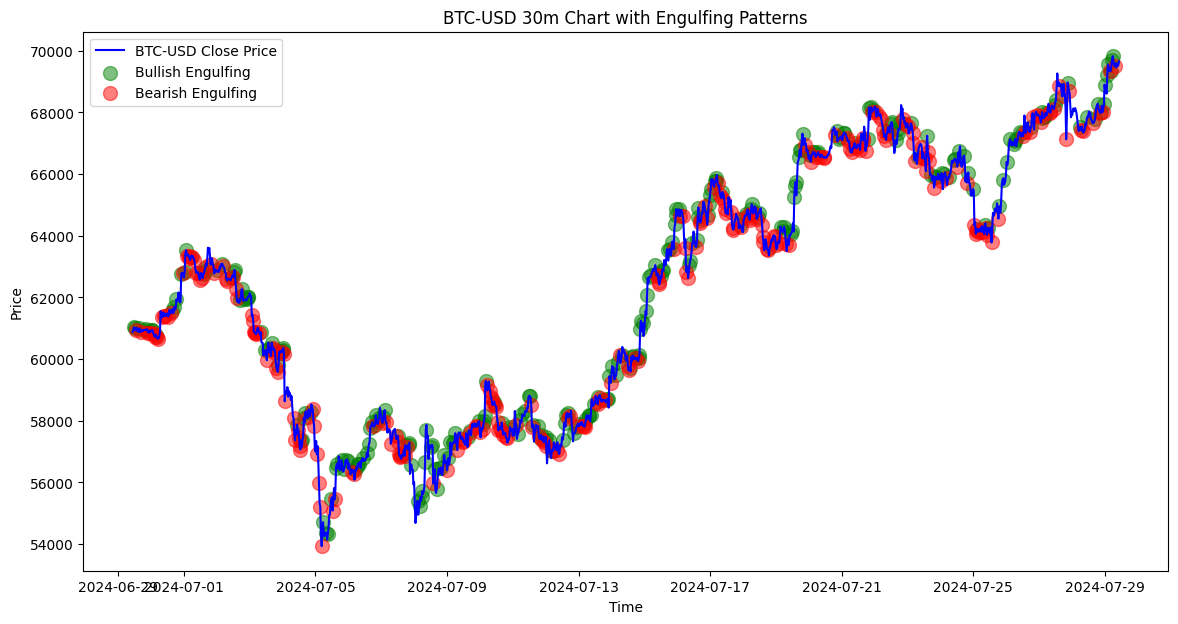

[*********************100%%**********************]  1 of 1 completed


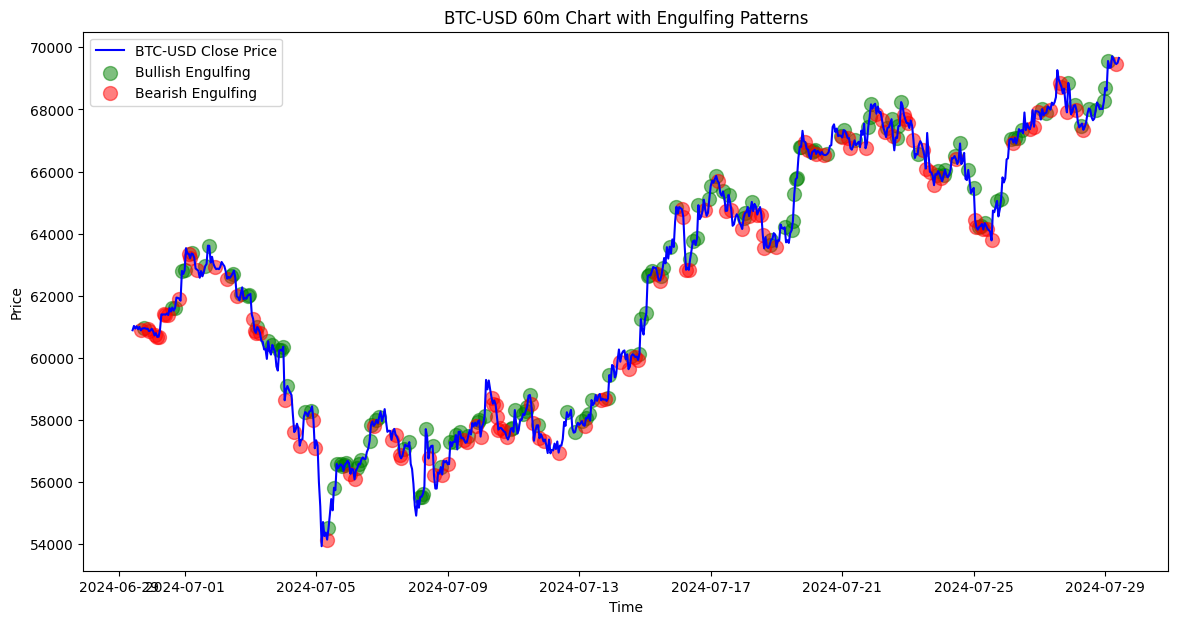

[*********************100%%**********************]  1 of 1 completed


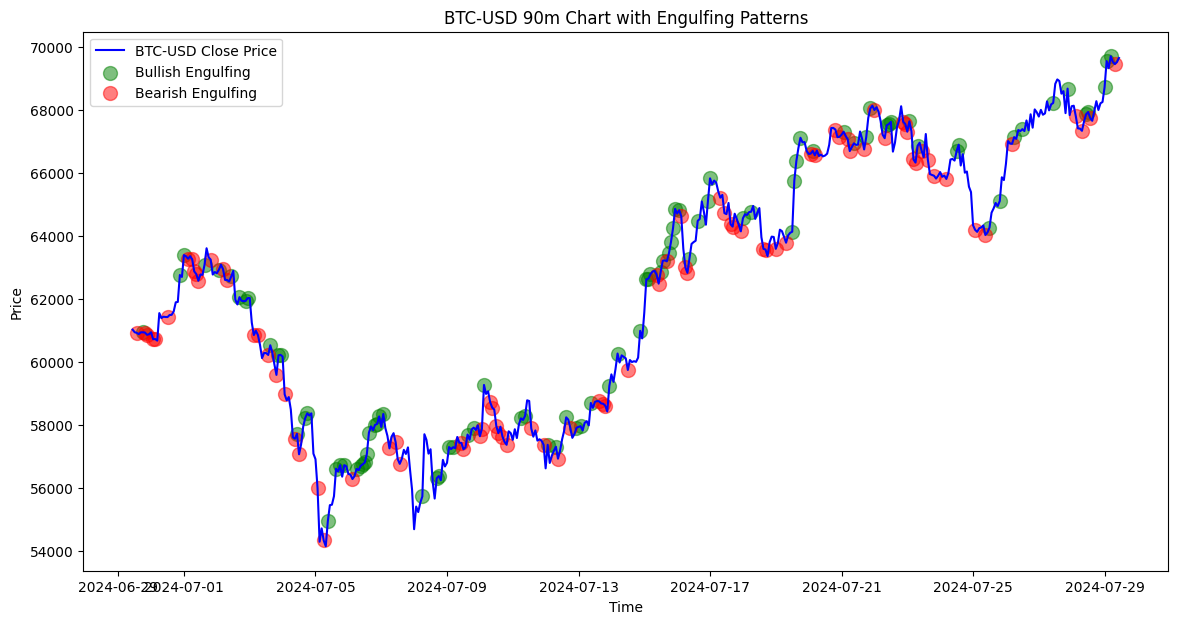

[*********************100%%**********************]  1 of 1 completed


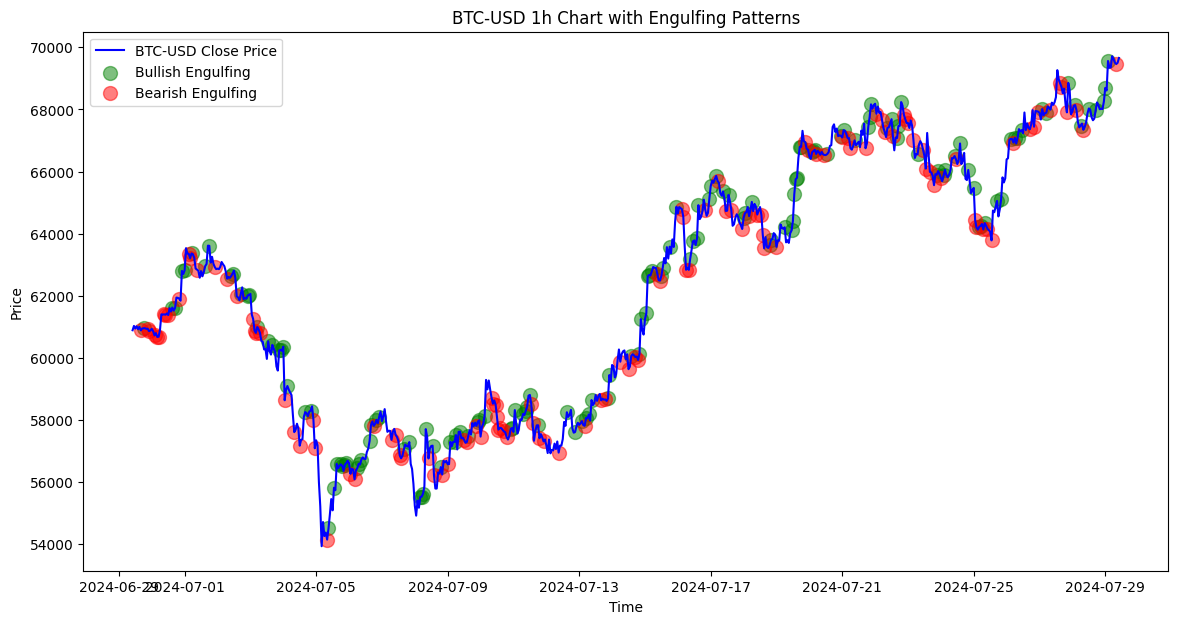

[*********************100%%**********************]  1 of 1 completed


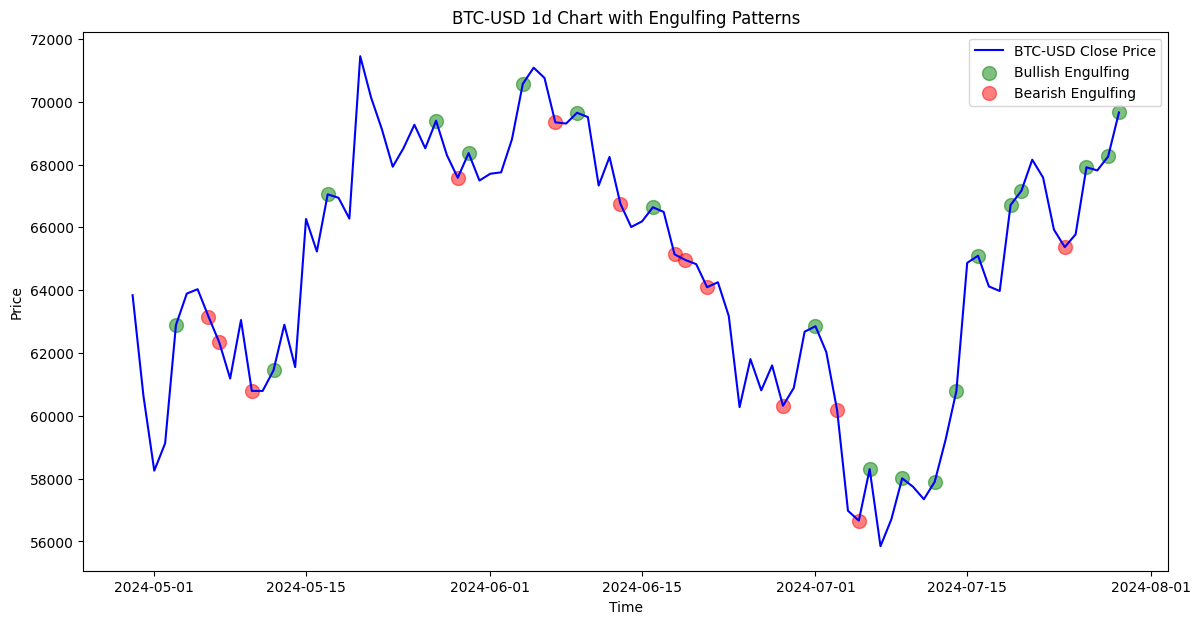

[*********************100%%**********************]  1 of 1 completed


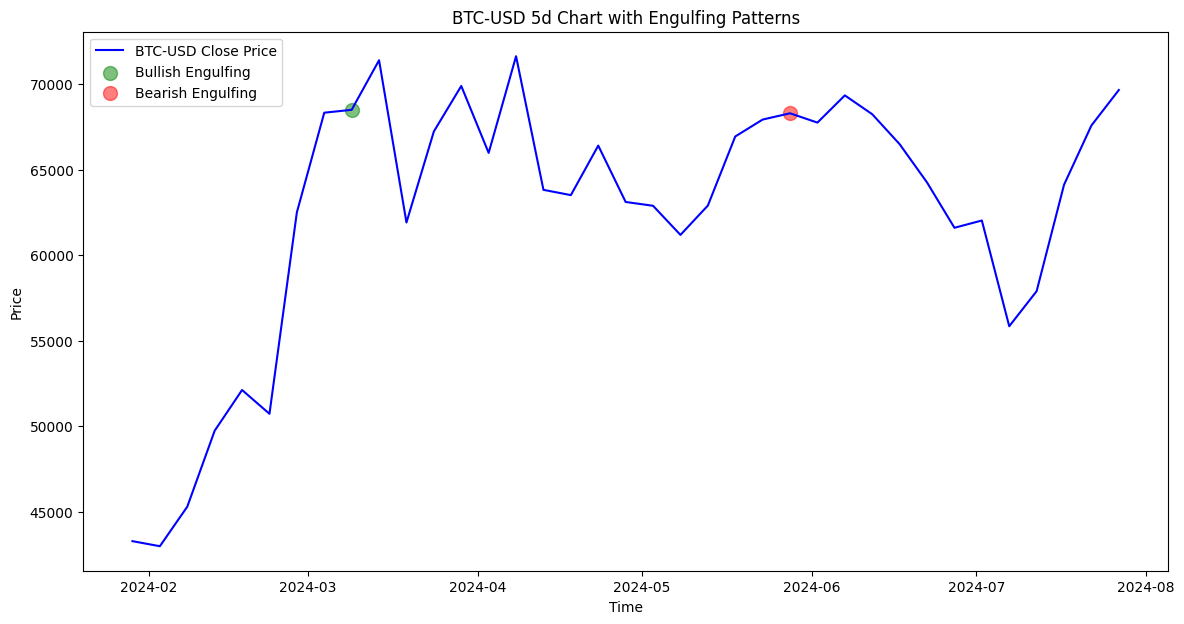

[*********************100%%**********************]  1 of 1 completed


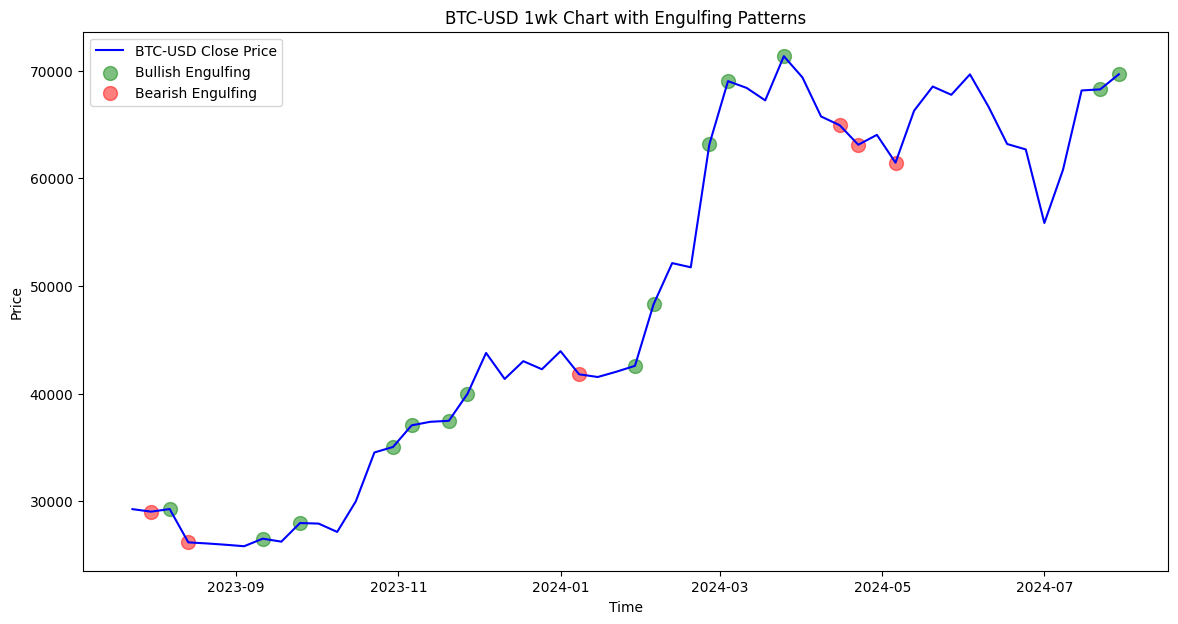

[*********************100%%**********************]  1 of 1 completed


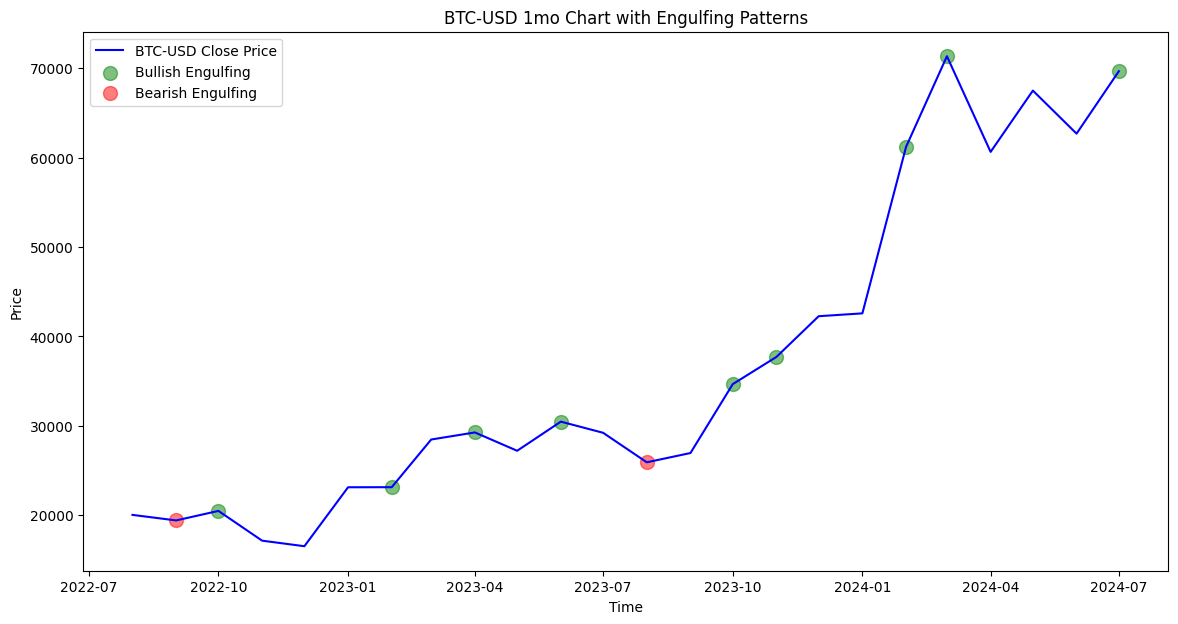

[*********************100%%**********************]  1 of 1 completed


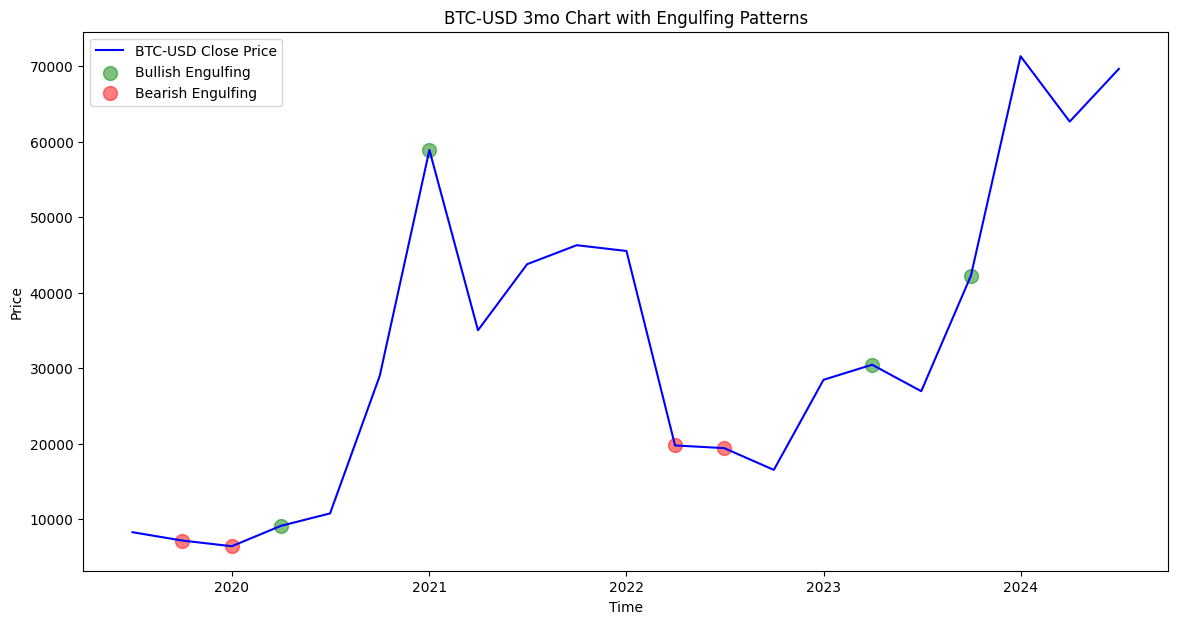

In [8]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas_ta as ta

# Liste des unités de temps (ordonnée du plus petit au plus grand)
timeframes = ['30m', '60m', '90m', '1h', '1d', '5d', '1wk', '1mo', '3mo']

# Mapper les unités de temps avec des périodes compatibles
period_map = {
    '30m': '1mo',
    '60m': '1mo',
    '90m': '1mo',
    '1h': '1mo',
    '1d': '3mo',
    '5d': '6mo',
    '1wk': '1y',
    '1mo': '2y',
    '3mo': '5y'
}

# Fonction pour détecter les patterns englobantes
def detect_engulfing(data):
    signals = {'bullish_engulfing': [], 'bearish_engulfing': []}
    for i in range(1, len(data)):
        # Bullish Engulfing
        if data['Open'][i] < data['Close'][i-1] and data['Close'][i] > data['Open'][i-1] and data['Close'][i] > data['Open'][i]:
            signals['bullish_engulfing'].append(i)

        # Bearish Engulfing
        elif data['Open'][i] > data['Close'][i-1] and data['Close'][i] < data['Open'][i-1] and data['Close'][i] < data['Open'][i]:
            signals['bearish_engulfing'].append(i)

    return signals

# Télécharger les données du BTC et détecter les patterns pour chaque unité de temps
btc_ticker = 'BTC-USD'

for tf in timeframes:
    period = period_map[tf]
    data = yf.download(btc_ticker, period=period, interval=tf)
    if not data.empty:
        signals = detect_engulfing(data)

        # Tracer le graphique
        plt.figure(figsize=(14, 7))
        plt.plot(data['Close'], label='BTC-USD Close Price', color='blue')

        # Ajouter les pastilles pour les patterns
        plt.scatter(data.index[signals['bullish_engulfing']], data['Close'][signals['bullish_engulfing']], color='green', s=100, alpha=0.5, label='Bullish Engulfing')
        plt.scatter(data.index[signals['bearish_engulfing']], data['Close'][signals['bearish_engulfing']], color='red', s=100, alpha=0.5, label='Bearish Engulfing')

        plt.title(f'BTC-USD {tf} Chart with Engulfing Patterns')
        plt.xlabel('Time')
        plt.ylabel('Price')
        plt.legend()
        plt.show()
    else:
        print(f"No data available for {btc_ticker} with interval {tf}")


# **Nous allons maintenant faire cette analyser sur les actifs retenus pour essayer de trouver là ou les patterns sont les plus intéressants à trader.**